# Проект: Статистический анализ данных

**Заголовок:** Исследование сервиса аренды самокатов Gofast

**Описание проекта:**
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:без подписки абонентская плата отсутствует; стоимость одной минуты поездки —  8 рублей; стоимость старта (начала поездки) —  50 рублей; с подпиской Ultra абонентская плата —  199 рублей в месяц; стоимость одной минуты поездки —  6 рублей; стоимость старта — бесплатно.
**Цель исследования**
Проанализировать данные и проверить гипотезы, которые помогуть развить бизнес сервиса аренды самокатов. Также, для определения какую подписку стоит продвигать сервису. 

**Ход исследования**

- Подготовка данных: загрузка и изучение общей информации из предоставленного датасета
- Предобработка данных:замена названий столбцов, корректировка типа данных,  дубликатов,проверка на пропуски и заполнение пропусков
- Исследовательский анализ данных: визуализация общих данных о пользователях и поездок
- Объединения данных: объединения датасетов и визулация данных по типу подписки
- Подсчет выручки: подсчитываем выручки от каждого пользователя помесячно 
- Проверка гипотез: проверяем гипотезы
- Распределения: подсчитать вероятности для улучшения бизнеса

**Общий вывод:** Резюмирования полученных результатов, формулировка ключевых выводов и рекомандаций 

С помощью данного исследования дать анализ данных пользователях и их поездок сервисом аренды самокатов. Также дать рекомендацию, какой вид подписки стоит продвигать.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

#### Шаг 1. Загрузка данных


In [2]:
#Функция для вывода информации об датасете
def dataset_info(dataset):
    print(dataset.info())
    display(dataset.head())

In [3]:
#Загрузка датасетов 
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
#Информация датасета пользователей
dataset_info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
#Информация датасета поездки
dataset_info(rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
#Информация датасета подписки
dataset_info(subscriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Промежуточный вывод**

Датасеты загрузились без ошибок и не имеют пропусков

В датасете подписки столбец date имеет тип данных object


#### Шаг 2. Предобработка данных

In [7]:
# функция проверки на дубликаты и пустые значения
def dataset_dub_null(dataset):
    print('Количество явных дубликатов в датасете:', dataset.duplicated().sum())
    print('Количество пропусков в датасете:')
    print(dataset.isnull().sum())

**Датасет Пользователи**

user_id - уникальный идентификатор пользователя

name - имя пользователя

age - возраст

city - город

subscription_type - тип подписки (free, ultra)

In [8]:
#Проверяем на дубликаты и пропуски
dataset_dub_null(users)

Количество явных дубликатов в датасете: 31
Количество пропусков в датасете:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


In [9]:
users = users.drop_duplicates()
print('Количество явных дубликатов в датасете:', users.duplicated().sum())

Количество явных дубликатов в датасете: 0


**Датасет Поездки**

user_id - уникальный идентификатор пользователя

distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)

duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

date - дата совершения поездки

In [10]:
#Проверяем на дубликаты и пропуски
dataset_dub_null(rides)

Количество явных дубликатов в датасете: 0
Количество пропусков в датасете:
user_id     0
distance    0
duration    0
date        0
dtype: int64


In [11]:
# изменение типа данных в date(object) на datetime
rides.date = pd.to_datetime(rides.date, format='%Y-%m-%d')

# cоздание нового столбца с номером месяца на основе столбца date
rides['month'] = rides.date.dt.month
dataset_info(rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
None


,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


**Датасет Подписки**

subscription_type - тип подписки

minute_price - стоимость одной минуты поездки по данной подписке

start_ride_price - стоимость начала поездки

subscription_fee - стоимость ежемесячного платежа

In [12]:
#Проверяем на дубликаты и пропуски
dataset_dub_null(subscriptions)

Количество явных дубликатов в датасете: 0
Количество пропусков в датасете:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


**Промежуточный вывод**

-Обнаружили и убрали дубликаты в датасете Пользователи

-Изменили тип данных в датасете Поездки стоблца "date" с object на datetime

-Создали новый столбец в датасете Поездки с номером месяца на основе данных столбца "date"

#### Шаг 3. Исследовательский анализ данных

**Опишите и визуализируйте общую информацию о пользователях и поездках:**

##### Частота встречаемости городов;

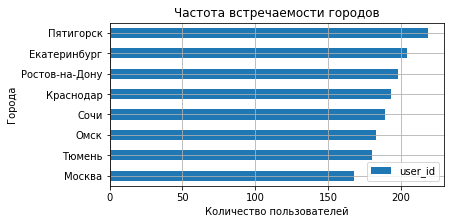

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [13]:
users_city = users.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count').sort_values(by = 'user_id')
users_city.plot.barh(figsize = (6,3), 
                     grid = True,
                     title = 'Частота встречаемости городов')     
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()
users_city.sort_values(by = 'user_id', ascending = False)

**Вывод:**
 
Датасет содержит данные из 8 городов

Больше всего пользователей в GoFast  в Пятигорске - 219 пользователей, меньше всего в Москве - 168 пользователей

##### Cоотношение пользователей с подпиской и без подписки;

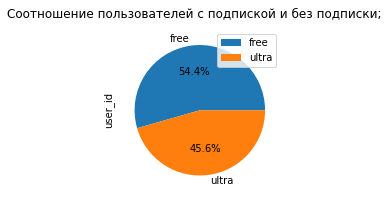

,user_id
subscription_type,
free,835
ultra,699


In [14]:
users_sub = users.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count')
users_sub.plot.pie(figsize = (6,3), 
                    subplots=True,
                    autopct='%1.1f%%',
                    title = 'Cоотношение пользователей с подпиской и без подписки;')

plt.show()
users_sub

Пользователей без подписки больше, чем пользователей с подпиской ultra

#####  Возраст пользователей;

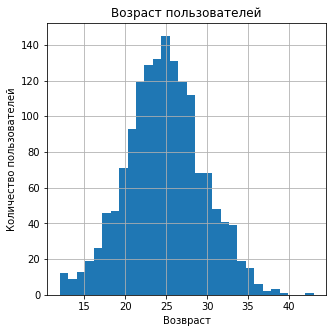

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [15]:
users['age'].hist(grid=True,
                figsize=(5,5),
                bins=30)
plt.xlabel('Возвраст')
plt.ylabel('Количество пользователей')
plt.title('Возраст пользователей')
plt.show()
users['age'].describe()

**Вывод**

Данные имеют нормальное распределение, пик и преобладающий возвраст имеет 25 лет, средний возвраст 24,9 лет

#####  Расстояние, которое пользователь преодолел за одну поездку;

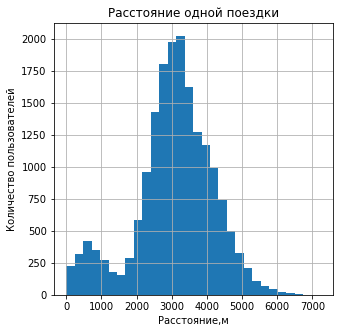

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [16]:
rides['distance'].hist(grid=True,
                figsize=(5,5),
                bins=30)
plt.xlabel('Расстояние,м')
plt.ylabel('Количество пользователей')
plt.title('Расстояние одной поездки')
plt.show()
rides['distance'].describe()

**Вывод**

Среднее расстоние за одну поездку большинсвта пользователей составляет 3070м. Также на 700м пройденнего расстояние есть всплеск, возможно это связано с тем, что пользователи хотят добраться до ближайшего метро, остановки. 


##### Продолжительность поездок.

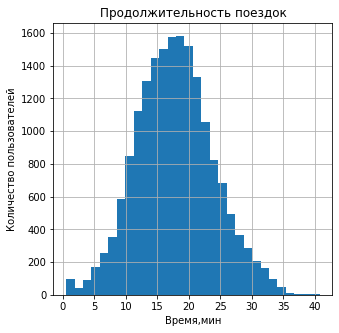

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [17]:
rides['duration'].hist(grid=True,
                figsize=(5,5),
                bins=30)
plt.xlabel('Время,мин')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок')
plt.show()
rides['duration'].describe()

**Вывод**
Данные распределяются нормальным распределением. Среднее время поездки - 17,8 минут.

#### Шаг 4. Объединение данных

##### Объедините данные о пользователях, поездках и подписках в один датафрейм. 

In [18]:
print('Количество строк в датасете rides:',rides.shape[0])


Количество строк в датасете rides: 18068


In [19]:
merged_df = rides.copy()
merged_df = merged_df.merge(users, how = 'left', on = 'user_id' )
merged_df = merged_df.merge(subscriptions, how = 'left', on='subscription_type')
display(merged_df)
print('Количество строк в датасете df_mrg_free:', merged_df.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


Количество строк в датасете df_mrg_free: 18068


In [20]:
dataset_dub_null(merged_df)

Количество явных дубликатов в датасете: 0
Количество пропусков в датасете:
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


##### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
c данными о пользователях без подписки;

с данными о пользователях с подпиской.

In [21]:
merged_df_free = merged_df[merged_df['subscription_type'] == 'free']
display(merged_df_free.head())
print('Количество строк в датасете df_mrg_free:', merged_df_free.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


Количество строк в датасете df_mrg_free: 11568


In [22]:
merged_df_ultra = merged_df[merged_df['subscription_type'] == 'ultra']
display(merged_df_ultra.head())
print('Количество строк в датасете df_mrg_free:', merged_df_ultra.shape[0])

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Количество строк в датасете df_mrg_free: 6500


##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

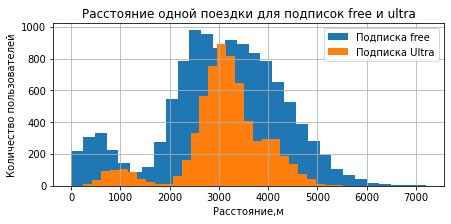

In [23]:
merged_df_free['distance'].hist(grid=True, figsize = (7,3), bins=30, label='Подписка free')
merged_df_ultra['distance'].hist(grid=True, figsize = (7,3), bins=30, label= 'Подписка Ultra')
plt.title('Расстояние одной поездки для подписок free и ultra')
plt.xlabel('Расстояние,м')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

**Вывод**

Графики имеют схожие всплески, однако пользователей с подпиской ультра меньше, чем с бесплатной подпиской. Также пользователи без подписки имеют минимальные и максмимальные дистанции одной поездки, чем пользователи с подпиской. Связано это тем с тем, что пользователей без подписок больше. 

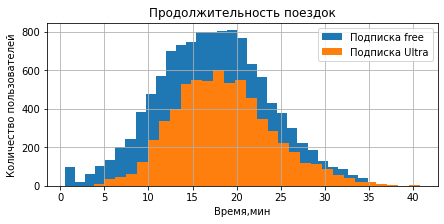

In [24]:
merged_df_free['duration'].hist(grid=True, figsize = (7,3), bins=30, label='Подписка free')
merged_df_ultra['duration'].hist(grid=True, figsize = (7,3), bins=30, label= 'Подписка Ultra')
plt.xlabel('Время,мин')
plt.ylabel('Количество пользователей')
plt.title('Продолжительность поездок')
plt.legend(loc='upper right')
plt.show()

**Вывод**

Графики похоже с друг другом и имеют нормальное распределение. Также пользователи без подписки имеют намного больше поездок с продолжительностью от 0 до 35 мин. однако, пользователей, которые имеют продолжительность поездки 35 мин и более имеют подписку, возможно это связано с тем, что оплата по минутно у них меньше. Однако таких пользователей мало. 


#### Шаг 5. Подсчёт выручки

##### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [25]:
#Округляем время поездки до след целого числа
merged_df['duration'] = np.ceil(merged_df['duration'])
merged_df['duration'] = merged_df['duration'].astype(int)
#Агрегация данных 
merged_df_agg = merged_df.pivot_table(index = ['user_id','month'], values = ['duration','distance'], aggfunc = ['count','sum'])
merged_df_agg.columns = ['_'.join(col) for col in merged_df_agg.columns.values]
merged_df_agg = merged_df_agg.drop(columns='count_duration').reset_index()
merged_df_agg

,user_id,month,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42
1,1,4,1,754.159807,7
2,1,8,2,6723.470560,46
3,1,10,2,5809.911100,32
4,1,11,3,7003.499363,56
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26
11327,1534,8,2,7622.453034,48
11328,1534,9,1,4928.173852,23
11329,1534,11,4,13350.015305,78


count_distance - количество поездок за месяц

sum_distance - сумма пройденной дистанции за месяц

sum_duration - сумма продолжительности поездок за месяц

##### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [26]:
merged_df_agg = merged_df_agg.merge(users, how='right', on='user_id')
merged_df_agg = merged_df_agg.merge(subscriptions, how = 'right', on='subscription_type')
merged_df_agg

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,1,1,2515.690719,15,Айдар,22,Омск,free,8,50,0
1,700,2,5,13446.659764,89,Айдар,22,Омск,free,8,50,0
2,700,3,1,3798.334905,19,Айдар,22,Омск,free,8,50,0
3,700,4,1,2984.551206,16,Айдар,22,Омск,free,8,50,0
4,700,6,2,5927.650988,29,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,699,6,1,4072.797406,17,Оксана,22,Москва,ultra,6,0,199
11327,699,8,2,7018.324143,45,Оксана,22,Москва,ultra,6,0,199
11328,699,9,2,6364.861911,31,Оксана,22,Москва,ultra,6,0,199
11329,699,10,1,4707.845501,16,Оксана,22,Москва,ultra,6,0,199


In [27]:
# Добавляем столбец с помесячной выручкой для каждого пользователя
def earning(row):
  earning_sum = 0
  earning_sum = (row['start_ride_price'] * row['count_distance'] +
              row['minute_price'] * row['sum_duration'] +
              row['subscription_fee']
              )
  return earning_sum

merged_df_agg['earning_sum'] = merged_df_agg.apply(earning, axis=1)
display(merged_df_agg[['user_id', 'name', 'month', 'earning_sum']])

,user_id,name,month,earning_sum
0,700,Айдар,1,170
1,700,Айдар,2,962
2,700,Айдар,3,202
3,700,Айдар,4,178
4,700,Айдар,6,332
...,...,...,...,...
11326,699,Оксана,6,301
11327,699,Оксана,8,469
11328,699,Оксана,9,385
11329,699,Оксана,10,295


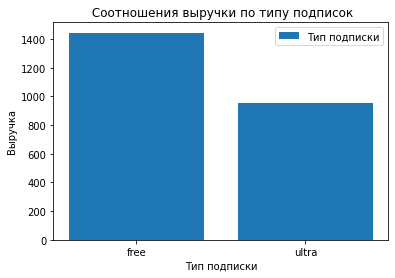

In [28]:
plt.bar(merged_df_agg['subscription_type'], merged_df_agg['earning_sum'], label='Тип подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Выручка')
plt.title(' Соотношения выручки по типу подписок')
plt.legend(loc='upper right')
plt.show()

**Вывод**

Пользователи без подписки дают в сумме больше выручки, чем пользователи с подписки. Это может быть связано с тем, что пользователей без подписок больше. 

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Нулевая гипотеза: средние значения трат пользователей из двух групп равны.

Альтернативная гипотеза: среднее значение трат пользователей с подпиской больше, чем среднее значение трат пользователей без подписки

In [29]:
alpha = 0.05 # уровень статистической значимости


results = st.ttest_ind(merged_df_ultra['duration'], merged_df_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Гипотеза верна: среднее время поездок пользователей с подпиской больше время поездок пользователей без подписки

In [30]:
#Проверка
print('Среднее время поездки пользователей c подпиской:', round(merged_df_ultra['duration'].mean(),2))
print('Среднее время поездки пользователей без подписки:', round(merged_df_free['duration'].mean(),2))

Среднее время поездки пользователей c подпиской: 18.54
Среднее время поездки пользователей без подписки: 17.39


##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза: среднее расстояние поездки пользователи с подпиской равна 3130 метрам

Альтернативная гипотеза: среднее расстояние поездки пользователи с подпиской больше 3130 метров

In [31]:
interested_value = 3130 

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(merged_df_ultra['distance'], interested_value, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Среднее значение расстояние поездки равна 3130м

In [32]:
#Проверка
print('Среднее дистанция поездки пользователей c подпиской:', round(merged_df_ultra['distance'].mean(),0))

Среднее дистанция поездки пользователей c подпиской: 3115.0


##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без равны.
    
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше чем выручка от пользователей без подписки

In [33]:
# создадим две выборки с посчитанной помесячной выручкой
merged_df_agg_ultra = merged_df_agg[merged_df_agg['subscription_type'] == 'ultra']
merged_df_agg_free = merged_df_agg[merged_df_agg['subscription_type'] == 'free']

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(merged_df_agg_ultra['earning_sum'], merged_df_agg_free['earning_sum'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что помесячная выручка от пользователи с подпиской больше.

In [34]:
# проверка
print('Средняя помесячная выручка от пользователи с подпиской:', round(merged_df_agg_ultra['earning_sum'].mean(),2))
print('Средняя помесячная выручка от пользователи без подписки:', round(merged_df_agg_free['earning_sum'].mean(),2))

Средняя помесячная выручка от пользователи с подпиской: 362.79
Средняя помесячная выручка от пользователи без подписки: 328.64


##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки данной гипотезе, стоит провести проверку метода по равенстве средних для зависимых парных выборок. st.ttest_rel(before, after) позволяет сравнить данные до и после обновления


#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

<BarContainer object of 1001 artists>

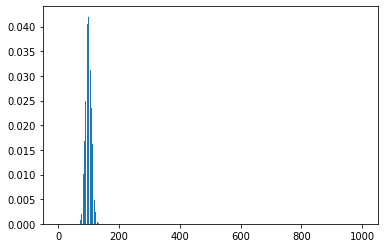

In [35]:
n = 1000
p = 0.1
distr = []

for k in range(0, n + 1):
    choose = factorial(n) / (factorial(k) * factorial(n - k))
    prob = choose * p**k * (1 - p)**(n - k)
    distr.append(prob)

plt.bar(range(0, n + 1), distr)

In [36]:
for n in range (500,1500):
    if binom.cdf(99, n, p) < 0.05:
        print("Минимальное число промокодов:", n)
        break

Минимальное число промокодов: 1161


Чтобы получить не менее 100 продленных подписок, где вероятность не выполнить план 5%, нужно разослать 1161 промокодов

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40%получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [37]:
#параметры биномиального распределения
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma)

x = 399500

result = distr.cdf(x)

print('Вероятность что push-уведомления откроют не более 399,5 тыс. пользователей:',
      round(result, 2))


Вероятность что push-уведомления откроют не более 399,5 тыс. пользователей: 0.15


При рассылки 1 млн уведомлений, что откроют не более 399,5 тысяч пользователей равно 15%

**Общий вывод**

**Предобработка данных**
- Обнаружены и убраны дубликаты в датасете Пользователи

- Изменен тип данных в датасете Поездки стоблца "date" с object на datetime

- Создан новый столбец в датасете Поездки с номером месяца на основе данных столбца "date"

**Исследовательских анализ данных**

- Датасет содержит данные из 8 городов

- Больше всего пользователей в GoFast в Пятигорске - 219 пользователей, меньше всего в Москве - 168 пользователей

- Данные по времени поездки распределяются нормальным распределением. Среднее время поездки составляет - 17,8 минут.

- Среднее расстоние за одну поездку большинсвта пользователей составляет 3070м. Также на 700м пройденнего расстояние есть всплеск, возможно это связано с тем, что пользователи хотят добраться до ближайшего метро, остановки. 

- Данные по возврасту имеют нормальное распределение, пик и преобладающий возвраст имеет 25 лет, средний возвраст 24,9 лет. 

**Объединение данных**

- Были объедены все датасеты в один датасет

- Были созданы два датасета, которые хранят данные о пользователей с подпиской и без

- Визуализация данных показала, что пользователи с подпиской и без, имеют одинаковые паттерны графиков и распределения. Однако пики расстояние за одну поездку и длительность поездки на графиках была выше у пользователей без подписок. 

**Подсчёт выручки**

- Были округлены до целых числах данные в столбце длительность поездки
- Была сделана агрегация данных
- Также был добавлен новый столбец, который через формулу считал помесячную выручку от каждого пользователя
- Также стало известно, что сумма выручки получаем больше от пользователей, которые не имеют подписки, однако на это влияет количество пользователей без подписок


**Проверка гипотез**
- 6.1 Мы подтвердили первую гипотезу, на самом деле пользователи с подпиской имеют больше времени поездок, чем пользователи без подписки

- 6.2 Не получилось подтвердить вторую гипотезу, так как среднее растояние поездок меньше 3130 метров

- 6.3 Мы подтвердили третью гипотезу, ведь отдельно пользователей с подпиской приносит больше выручки, чем пользователей без подписки

**Распределения**

- Для получения 100 продленных подписок и шансом 5% не выполнить план, нужно разослать 1161 промокодов 

- При расссылке 1 000 000 уведомлений, вероятность того, что его откроют не более 399,5 тысяч пользователей равна 15%


**Рекомендации**

Стоит больше продвигать Ultra подписку, так как индивидуально пользователей с подпиской приносит больше выгоды бизнесу. Более того, стоит внести какие то дополнительные функции в данную подписку, так как, только 1 пользователей из 11 его продлевает, при рассылки промокодов. Не стоит вносить изменения в бесплатную подписку, так как, суммарно такие пользователи приносят бизнесу на данный момент больше дохода, чем пользователи с подпиской, поэтому стоит их чем то привлекать. 